In [12]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import powerbox as pbox

In [6]:
# load binary files
file = '../data/z49.bin'

# open file
with open(file, 'rb') as f:
    # read data
    data = f.read()
    # convert to numpy array
    data = jnp.frombuffer(data, dtype=jnp.float32)

# reshape data
N = 256
data = data.reshape(N, N, N)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


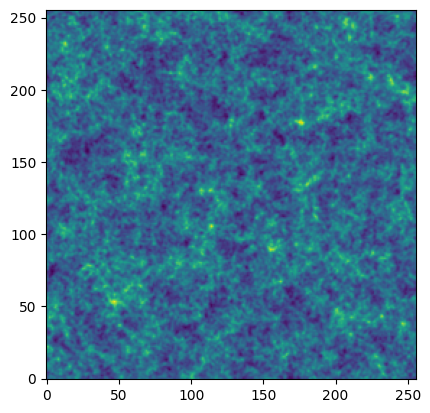

In [17]:
# plot data
plt.figure()
plt.imshow(data[N//2], origin='lower')

In [ ]:

power_spectrum = cosmax.spectral_ops.PowerSpectrum(
    N, 40, 1.0)

# compute power spectrum
k, power = power_spectrum(data)

(256, 256, 256)


/home/andrin/miniconda3/envs/cosmax/lib/python3.12/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/andrin/miniconda3/envs/cosmax/lib/python3.12/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


/home/andrin/miniconda3/envs/cosmax/lib/python3.12/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


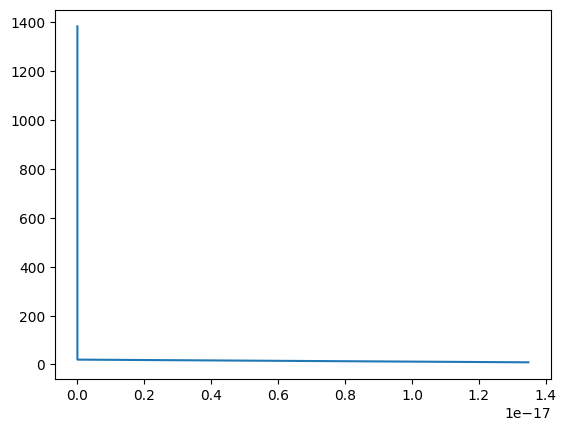

In [16]:
# generate power spectrum with powerbox
k_box, power_box = pbox.get_power(data, 1.0)

# plot power spectrum
# plt.plot(k, power, label='cosmax')
plt.plot(k_box, power_box, label='powerbox')
